 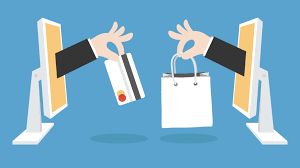
# About Dataset
The dataset was obtained from a UK-based online store.
Includes sales between 01/12/2009 - 09/12/2011.

**Dataset Columns**
- InvoiceNo: Invoice number. The unique number of each transaction, namely the invoice. Aborted operation if it starts with C.

- StockCode: Product code. Unique number for each product

- Description: Product name

- Quantity: Number of products. It expresses how many of the products on the invoices have been sold.

- InvoiceDate: Invoice date and time.

- UnitPrice: Product price (in GBP)

- CustomerID: Unique customer number

- Country: Country name. Country where the customer lives.

## Steps
### 1. Data Preprocessing
Data preprocessing is a critical step in data analysis and machine learning, as it involves transforming raw data into a format that is suitable for analysis or model training. This process can include cleaning the data by removing duplicates, correcting errors, and handling missing values, as well as transforming the data by scaling or normalizing it, feature engineering, and selecting relevant variables. The goal of data preprocessing is to improve the quality of the data and reduce the noise, so that it can be analyzed effectively and used to develop accurate models that provide meaningful insights. Overall, data preprocessing is a crucial step in any data science project, as it can greatly impact the accuracy and effectiveness of the resulting models.

### 2. Create Association Rule Learning(ARL) data structure,
This is Association Rule Learning, a learning method used as a data mining technique that aims to determine the relationships between items in a dataset.

Association Rule Learning is used to discover frequency-based relationships between items in a dataset. For example, in a customer shopping dataset in a market, there could be a rule like "customers who buy milk also buy bread." This rule can be used to analyze customer behavior and develop more effective marketing strategies.

Association Rule Learning typically consists of two steps: 1) Creating frequency tables and 2) Determining association rules. Frequency tables show the frequency of items appearing together in the dataset, while the association rule determines the relationship between items.

Association Rule Learning is especially used for analyzing large datasets, such as in the retail sector. This technique is an important tool for developing marketing strategies, product placement, and inventory management.

### 3. Extracting Association Rules
Extracting Association Rules is a data mining technique used to determine relationships between items in a dataset. This technique is also known as Association Rule Learning.

Extracting Association Rules is commonly used for analyzing large datasets, such as in the retail sector. This technique is an important tool for analyzing customer behavior, developing marketing strategies, product placement, and inventory management.

Extracting Association Rules is used to determine relationships between items in a dataset. For example, in a customer shopping dataset in a market, there could be a rule like "customers who buy milk also buy bread." This rule can be used to analyze customer behavior and develop more effective marketing strategies.

Extracting Association Rules typically consists of two steps: 1) Creating frequency tables and 2) Determining association rules. Frequency tables show the frequency of items appearing together in the dataset, while association rules determine the relationship between items.

### 4. Making Product Suggestions to Users at the Basket Stage
Suggesting a product according to the product in the customer's basket

In [1]:
import numpy as np
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

In [2]:
df_ = pd.read_excel('/kaggle/input/online-retail-gift-products/online_retail_II.xlsx'
                ,sheet_name="Year 2010-2011")

In [3]:
df = df_.copy()

# EDA(Exploratory Data Analysis)

In [4]:
def eda(dataframe):
    print(f"""
    
    -- Info --
    
    {dataframe.dtypes}
    
    -- NaN Values --
    
    {dataframe.isnull().sum()}
    
    -- Shape --
    
    {dataframe.shape}
    
    -- Unique --
    
    {df.apply(lambda x: x.nunique())}
    
    -- Head --
    """)
    
    
    return dataframe.head()
eda(df)


    
    -- Info --
    
    Invoice                object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
Price                 float64
Customer ID           float64
Country                object
dtype: object
    
    -- NaN Values --
    
    Invoice             0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
Price               0
Customer ID    135080
Country             0
dtype: int64
    
    -- Shape --
    
    (541910, 8)
    
    -- Unique --
    
    Invoice        25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
Price           1630
Customer ID     4372
Country           38
dtype: int64
    
    -- Head --
    


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,541910.0,9.552234,218.080957,-80995.00,1.00,3.00,10.00,80995.0
Price,541910.0,4.611138,96.759765,-11062.06,1.25,2.08,4.13,38970.0
Customer ID,406830.0,15287.684160,1713.603074,12346.00,13953.00,15152.00,16791.00,18287.0


There is a problem above. Price and quantity cannot be negative. These are most likely the result of the return process. We need to remove these 

Those with invoice value of c are also refundable.

There are missing values ​​in the dataset, we need to delete them too

In [6]:
def retail_data_prep(dataframe):
    dataframe.dropna(inplace=True)
    dataframe = dataframe[~dataframe["Invoice"].str.contains("C", na=False)]
    dataframe = dataframe[dataframe["Quantity"] > 0]
    dataframe = dataframe[dataframe["Price"] > 0]
    return dataframe

df = retail_data_prep(df)

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,397885.0,12.988208,179.331551,1.000,2.00,6.00,12.00,80995.00
Price,397885.0,3.116525,22.097861,0.001,1.25,1.95,3.75,8142.75
Customer ID,397885.0,15294.416882,1713.144421,12346.000,13969.00,15159.00,16795.00,18287.00


As seen above, we got rid of values ​​from return operations.

BUT

There are outliers, for example, the closeness between the min, 25%, 50%, 75% of the price value and the closeness between the max value indicate outliers. The same is true for the quantity value

### **Suppressing outliers**
Suppressing outliers refers to the process of removing or modifying extreme values in a dataset that are considered as outliers. Outliers are data points that are significantly different from other data points and are often the result of erroneous measurements or recordings. These values can have unwanted effects on data analysis and modeling and can lead to misleading results. Suppressing outliers is an important step to improve the quality of the dataset and obtain accurate results.

In [8]:
def outlier_thresholds(dataframe, variable):
    quartile1 = dataframe[variable].quantile(0.01)
    quartile3 = dataframe[variable].quantile(0.99)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

replace_with_thresholds(df, "Quantity")
replace_with_thresholds(df, "Price")

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,397885.0,11.830770,25.523052,1.000,2.00,6.00,12.00,298.50
Price,397885.0,2.893492,3.227175,0.001,1.25,1.95,3.75,37.06
Customer ID,397885.0,15294.416882,1713.144421,12346.000,13969.00,15159.00,16795.00,18287.00


As can be seen, this difference has decreased to a reasonable level.

# Preparing ARL Data Structure (Invoice-Product Matrix)

ARL stands for Association Rule Learning, which is a data mining technique used to discover relationships between items in a dataset. ARL Data Structure is the data structure used in the ARL algorithm and it stores frequency-based itemset data.

ARL Data Structure helps to discover association rules between items by calculating their frequency of occurrence in the dataset. This data structure contains pre-processed data for the ARL algorithm to work on, and also allows for the processing of new data.

ARL Data Structure is typically represented as a multidimensional matrix, with each dimension representing an item in an itemset. For example, in a market dataset, a two-dimensional matrix can be created for "milk" and "bread" items. This matrix will contain frequency-based data for these two items occurring together.

ARL Data Structure is used to analyze relationships between items and helps the ARL algorithm to discover association rules in the dataset.

Since the dataset is very large, I will continue by reducing the dataset to one country.

In [10]:
df_fr = df[df['Country'] == "France"]
df_fr.shape

(8342, 8)

We are trying to obtain a dataframe with invoice in the row, products in the column and quantity in the column.

In [11]:
df_fr.groupby(['Invoice', 'Description']).agg({"Quantity": "sum"}).head(20)

Quantity
Invoice Description                                  
536370   SET 2 TEA TOWELS I LOVE LONDON          24.0
        ALARM CLOCK BAKELIKE GREEN               12.0
        ALARM CLOCK BAKELIKE PINK                24.0
        ALARM CLOCK BAKELIKE RED                 24.0
        CHARLOTTE BAG DOLLY GIRL DESIGN          20.0
        CIRCUS PARADE LUNCH BOX                  24.0
        INFLATABLE POLITICAL GLOBE               48.0
        LUNCH BOX I LOVE LONDON                  24.0
        MINI JIGSAW CIRCUS PARADE                24.0
        MINI JIGSAW SPACEBOY                     24.0
        MINI PAINT SET VINTAGE                   36.0
        PANDA AND BUNNIES STICKER SHEET          12.0
        POSTAGE                                   3.0
        RED TOADSTOOL LED NIGHT LIGHT            24.0
        ROUND SNACK BOXES SET OF4 WOODLAND       24.0
        SET/2 RED RETROSPOT TEA TOWELS           18.0
        SPACEBOY LUNCH BOX                       24.0
        STARS GIFT TAPE                          24.0
        VINTAGE HEADS AND TAILS CARD GAME        24.0
        VINTAGE SEASIDE JIGSAW PUZZLES           12.0

In [12]:
df_fr.groupby(['Invoice', 'Description']).agg({"Quantity": "sum"}).unstack().iloc[0:5, 0:5]

Quantity                     \
Description  50'S CHRISTMAS GIFT BAG LARGE  DOLLY GIRL BEAKER   
Invoice                                                         
536370                                 NaN                NaN   
536852                                 NaN                NaN   
536974                                 NaN                NaN   
537065                                 NaN                NaN   
537463                                 NaN                NaN   

                                                                   \
Description  I LOVE LONDON MINI BACKPACK  NINE DRAWER OFFICE TIDY   
Invoice                                                             
536370                               NaN                      NaN   
536852                               NaN                      NaN   
536974                               NaN                      NaN   
537065                               NaN                      NaN   
537463                               NaN                      NaN   

                                              
Description  SET 2 TEA TOWELS I LOVE LONDON   
Invoice                                       
536370                                  24.0  
536852                                   NaN  
536974                                   NaN  
537065                                   NaN  
537463                                   NaN

We will fill null values ​​with 0

In [13]:
df_fr.groupby(['Invoice', 'Description']).agg({"Quantity": "sum"}).unstack().fillna(0).iloc[0:5, 0:5]

Quantity                     \
Description  50'S CHRISTMAS GIFT BAG LARGE  DOLLY GIRL BEAKER   
Invoice                                                         
536370                                 0.0                0.0   
536852                                 0.0                0.0   
536974                                 0.0                0.0   
537065                                 0.0                0.0   
537463                                 0.0                0.0   

                                                                   \
Description  I LOVE LONDON MINI BACKPACK  NINE DRAWER OFFICE TIDY   
Invoice                                                             
536370                               0.0                      0.0   
536852                               0.0                      0.0   
536974                               0.0                      0.0   
537065                               0.0                      0.0   
537463                               0.0                      0.0   

                                              
Description  SET 2 TEA TOWELS I LOVE LONDON   
Invoice                                       
536370                                  24.0  
536852                                   0.0  
536974                                   0.0  
537065                                   0.0  
537463                                   0.0

If there are values ​​greater than 0 we will make them 1

In [14]:
df_fr.groupby(['Invoice', 'StockCode']).agg({"Quantity": "sum"}).unstack().fillna(0).applymap(lambda x: 1 if x > 0 else 0).iloc[0:5, 0:5]


Quantity                        
StockCode    10002 10120 10125 10135 11001
Invoice                                   
536370           1     0     0     0     0
536852           0     0     0     0     0
536974           0     0     0     0     0
537065           0     0     0     0     0
537463           0     0     0     0     0


We have progressed with description here, but we can also do this with stockCode. Let's write a function based on preference

In [15]:
def create_invoice_product_df(dataframe, id=False):
    if id:
        return dataframe.groupby(['Invoice', "StockCode"])['Quantity'].sum().unstack().fillna(0). \
            applymap(lambda x: 1 if x > 0 else 0)
    else:
        return dataframe.groupby(['Invoice', 'Description'])['Quantity'].sum().unstack().fillna(0). \
            applymap(lambda x: 1 if x > 0 else 0)
fr_inv_pro_df = create_invoice_product_df(df_fr, id=True)

Function for which id which product question

In [16]:
def check_id(dataframe, stock_code):
    product_name = dataframe[dataframe["StockCode"] == stock_code][["Description"]].values[0].tolist()
    print(product_name)

In [17]:
check_id(df_fr, 10120)

['DOGGY RUBBER']


# Extracting Association Rules

Extracting Association Rules is the process of discovering frequent patterns, relationships, and associations among items in a dataset using Association Rule Learning (ARL) algorithms. The aim of extracting association rules is to identify relationships between different items and to derive insights that can be used for various applications.

In this process, the ARL algorithm scans through the dataset and identifies frequent itemsets, which are sets of items that occur together frequently. It then uses these frequent itemsets to generate association rules that describe the relationships between items. These rules are usually presented in the form of "if X, then Y", where X and Y are itemsets.

For example, in a retail dataset, an association rule may be "if a customer buys bread and milk, they are likely to also buy butter". These rules can be used to identify buying patterns and to develop targeted marketing strategies.

Extracting Association Rules is a crucial step in data mining and is used in various fields such as market basket analysis, customer segmentation, and recommendation systems. It helps organizations to understand the relationships between different items and to make informed decisions based on the insights derived from these relationships.

## Association Rules
### Support
Support is a term used in Association Rule Learning (ARL) to measure the frequency of occurrence of an itemset in a dataset. It is a key metric used in the process of discovering frequent itemsets and generating association rules.

In ARL, support is defined as the proportion of transactions in a dataset that contain a particular itemset. For example, if we are analyzing a retail dataset and the itemset is "bread and milk", then the support for this itemset would be the percentage of transactions in the dataset that include both "bread and milk".

Support is used as a measure of significance and is usually represented as a percentage or decimal value between 0 and 1. Higher support values indicate that the itemset is more frequent in the dataset and therefore more significant.

Support is an important metric in ARL as it is used to identify frequent itemsets, which are sets of items that occur together frequently. These frequent itemsets are then used to generate association rules, which can provide insights into the relationships between different items in the dataset.

### Confidence
Confidence is an important metric in Association Rule Learning (ARL). It measures the strength of the relationship between the antecedent and consequent of an association rule. Confidence is defined as the conditional probability of finding the consequent itemset in a transaction given that the antecedent itemset is present in the same transaction.

In other words, confidence measures how often the consequent itemset appears in transactions that contain the antecedent itemset. For example, if the antecedent itemset is "bread and milk", confidence would measure the likelihood of finding "milk" in transactions that already contain "bread". Confidence values range from 0 to 1, with higher values indicating stronger relationships between the antecedent and consequent itemsets.

Confidence is used to evaluate the quality of association rules generated by ARL algorithms. A rule with high confidence indicates that the presence of the antecedent itemset is highly predictive of the presence of the consequent itemset in transactions. This information can be used to guide decision making in areas such as marketing and sales, where understanding customer behavior and preferences is critical.

### Lift
Lift is an important metric in Association Rule Learning (ARL). It measures the strength of association between the antecedent and consequent of an association rule, while taking into account the frequency of the consequent itemset in the dataset.

Lift is defined as the ratio of the observed support of the antecedent and consequent itemsets to the expected support if they were independent. In other words, lift measures how much more often the consequent itemset appears in transactions containing the antecedent itemset compared to its expected frequency if the two itemsets were independent.

A lift value greater than 1 indicates that the antecedent and consequent itemsets are positively correlated, meaning that the presence of the antecedent itemset in a transaction increases the likelihood of the consequent itemset being present. A lift value equal to 1 indicates that the antecedent and consequent itemsets are independent, while a lift value less than 1 indicates a negative correlation between the itemsets.

Lift is often used in combination with support and confidence to evaluate the quality of association rules generated by ARL algorithms. A rule with high lift indicates a strong relationship between the antecedent and consequent itemsets that is not due to chance, and can be used to guide decision making in areas such as product recommendations and market basket analysis.

### Leverage
Leverage is a measure in Association Rule Learning (ARL) that assesses the level of independence between the antecedent and consequent of an association rule.

Leverage is a measure of the difference between the observed frequency of the antecedent and consequent itemsets in the dataset, and their expected frequency under independence. In other words, leverage determines how often the antecedent and consequent itemsets occur together compared to what is expected by chance.

As the leverage value approaches 0, the relationship between the antecedent and consequent itemsets becomes weaker. On the other hand, a positive leverage value indicates that the antecedent and consequent itemsets occur together more often than expected, indicating a strong relationship between them.

Leverage is used in conjunction with support and confidence to evaluate the quality of association rules generated by ARL algorithms. High leverage values indicate a strong relationship between the antecedent and consequent itemsets, and these rules can be used to support decision making in areas such as product recommendations and market basket analysis.

### Conviction

Conviction is a measure in Association Rule Learning (ARL) that is used to assess the level of dependence between the antecedent and consequent of an association rule.

Conviction is a ratio that compares the probability that the antecedent and consequent are not related, given their marginal probabilities, to the actual dependency between them. It is calculated by dividing the probability that the antecedent and consequent are not related by the probability that they are not related, given the antecedent.

Conviction values range from 0 to infinity. A conviction value of 1 indicates that the antecedent and consequent are independent, while a value greater than 1 indicates a positive dependence, and a value less than 1 indicates a negative dependence.

Conviction is used in conjunction with support, confidence, and lift to evaluate the quality of association rules generated by ARL algorithms. High conviction values indicate a strong dependence between the antecedent and consequent itemsets, making the rules more valuable for decision making, such as in marketing campaigns or cross-selling strategies.


In [18]:
frequent_itemsets = apriori(fr_inv_pro_df,
                            min_support=0.01,
                            use_colnames=True)

/opt/conda/lib/python3.7/site-packages/mlxtend/frequent_patterns/fpcommon.py:115: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  DeprecationWarning,


In [19]:
frequent_itemsets.sort_values("support", ascending=False)

,support,itemsets
538,0.773779,(POST)
387,0.187661,(23084)
107,0.179949,(21731)
243,0.172237,(22554)
245,0.169666,(22556)
...,...,...
18793,0.010283,"(22729, 21086, 22326, 22551)"
18787,0.010283,"(23256, 21086, 22492, 22326)"
18786,0.010283,"(22728, 21086, 22492, 22326)"
18785,0.010283,"(21086, 22492, 22326, 22727)"


In [20]:
rules = association_rules(frequent_itemsets,
                          metric="support",
                          min_threshold=0.01)

In [21]:
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(10002),(21791),0.020566,0.028278,0.010283,0.500000,17.681818,0.009701,1.943445
1,(21791),(10002),0.028278,0.020566,0.010283,0.363636,17.681818,0.009701,1.539111
2,(10002),(21915),0.020566,0.069409,0.010283,0.500000,7.203704,0.008855,1.861183
3,(21915),(10002),0.069409,0.020566,0.010283,0.148148,7.203704,0.008855,1.149771
4,(10002),(22551),0.020566,0.136247,0.010283,0.500000,3.669811,0.007481,1.727506


In [22]:
rules[(rules["support"]>0.05) & (rules["confidence"]>0.1) & (rules["lift"]>5)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1606,(21080),(21086),0.133676,0.138817,0.102828,0.769231,5.541311,0.084271,3.731791
1607,(21086),(21080),0.138817,0.133676,0.102828,0.740741,5.541311,0.084271,3.341535
1608,(21080),(21094),0.133676,0.128535,0.102828,0.769231,5.984615,0.085646,3.776350
1609,(21094),(21080),0.128535,0.133676,0.102828,0.800000,5.984615,0.085646,4.331620
1776,(21086),(21094),0.138817,0.128535,0.123393,0.888889,6.915556,0.105550,7.843188
...,...,...,...,...,...,...,...,...,...
213940,"(POST, 22727)","(22728, 22726)",0.089974,0.074550,0.059126,0.657143,8.814778,0.052418,2.699229
213941,"(22726, 22727)","(22728, POST)",0.079692,0.092545,0.059126,0.741935,8.017025,0.051751,3.516388
213942,(22728),"(POST, 22726, 22727)",0.102828,0.074550,0.059126,0.575000,7.712931,0.051460,2.177529
213944,(22726),"(22728, POST, 22727)",0.097686,0.069409,0.059126,0.605263,8.720273,0.052346,2.357498


In [23]:
rules[(rules["support"]>0.05) & (rules["confidence"]>0.1) & (rules["lift"]>5)]. \
sort_values("confidence", ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
23707,"(21080, 21094)",(21086),0.102828,0.138817,0.100257,0.975000,7.023611,0.085983,34.447301
23706,"(21080, 21086)",(21094),0.102828,0.128535,0.100257,0.975000,7.585500,0.087040,34.858612
108820,"(21080, POST, 21086)",(21094),0.084833,0.128535,0.082262,0.969697,7.544242,0.071358,28.758355
108822,"(21080, POST, 21094)",(21086),0.084833,0.138817,0.082262,0.969697,6.985410,0.070486,28.419023
1777,(21094),(21086),0.128535,0.138817,0.123393,0.960000,6.915556,0.105550,21.529563
...,...,...,...,...,...,...,...,...,...
7212,(22629),(22630),0.125964,0.100257,0.071979,0.571429,5.699634,0.059351,2.099400
62249,(22630),"(POST, 22629)",0.100257,0.100257,0.053985,0.538462,5.370809,0.043933,1.949443
62244,"(POST, 22629)",(22630),0.100257,0.100257,0.053985,0.538462,5.370809,0.043933,1.949443
62248,(22629),"(POST, 22630)",0.125964,0.074550,0.053985,0.428571,5.748768,0.044594,1.619537


In [24]:
check_id(df_fr, 21080),check_id(df_fr, 21086)

['SET/20 RED RETROSPOT PAPER NAPKINS ']
['SET/6 RED SPOTTY PAPER CUPS']


(None, None)

Similar products

#  Making Product Suggestions to Users at the Basket Stage

Example:

 User experience product ID: 22492

In [25]:
product_id = 21080
check_id(df, product_id)

['SET/20 RED RETROSPOT PAPER NAPKINS ']


In [26]:
def arl_recommender(rules_df, product_id, rec_count=1):
    sorted_rules = rules_df.sort_values("lift", ascending=False)
    recommendation_list = []
    for i, product in enumerate(sorted_rules["antecedents"]):
        for j in list(product):
            if j == product_id:
                recommendation_list.append(list(sorted_rules.iloc[i]["consequents"])[0])

    return recommendation_list[0:rec_count]

In [27]:
arl_recommender(rules, product_id, 2)

[22303, 22356]

In [28]:
check_id(df, 21080),check_id(df, 22356),check_id(df, 22352)

['SET/20 RED RETROSPOT PAPER NAPKINS ']
['CHARLOTTE BAG PINK POLKADOT']
['LUNCH BOX WITH CUTLERY RETROSPOT ']


(None, None, None)